In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
X = 6 * np.random.rand(200,1)-3
y = 0.8 * X**2 + 0.9 * X  + 2 + np.random.randn(200,1)

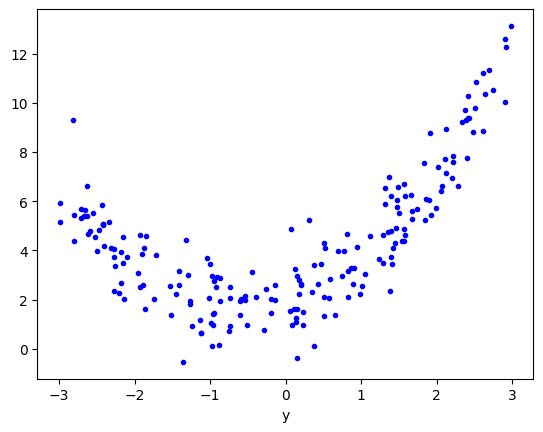

In [3]:
plt.plot(X,y,'b. ')
plt.xlabel("X")
plt.xlabel("y")
plt.show()

# SLR

In [4]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [6]:
r2_score(y_test,y_pred)

0.30035430237679717

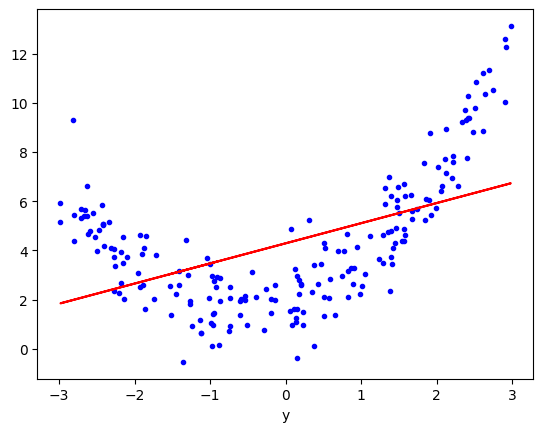

In [7]:
plt.plot(X,y,'b. ')
plt.plot(X_train,lr.predict(X_train),color='r')
plt.xlabel("X")
plt.xlabel("y")
plt.show()

# Polynomial Linear Regression

In [8]:
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)


In [9]:
print(X_train[0])
print(X_train_trans[0])


[-1.53260039]
[ 1.         -1.53260039  2.34886397]


In [10]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred_new = lr.predict(X_test_trans)

In [11]:
r2_score(y_test,y_pred_new)

0.8140158666916169

In [13]:
print(lr.coef_)
print(lr.intercept_)


[[0.         0.9313583  0.83848304]]
[1.85966155]


In [20]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

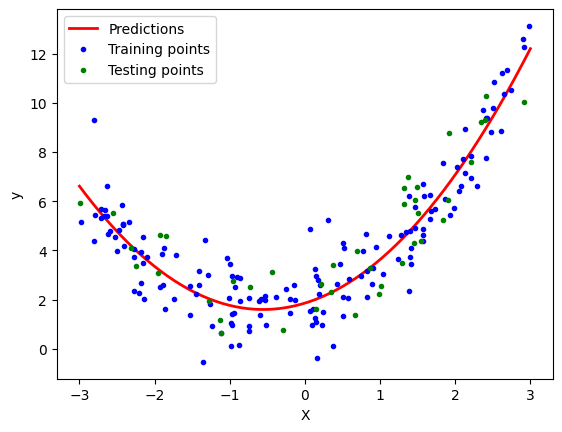

In [21]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [22]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

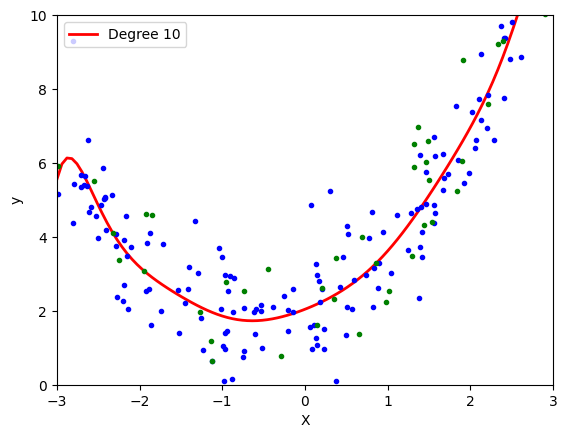

In [25]:
polynomial_regression(10)